In [ ]:
from google.colab import files
uploaded = files.upload()


Saving arabamm_com.csv to arabamm_com.csv
Saving arabammm_com.csv to arabammm_com.csv
Saving arabam_com.csv to arabam_com.csv


In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error                                        # To scale the error, taking logarithm of it makes it more rigid
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score


data = pd.read_csv(io.BytesIO(uploaded['arabam_com.csv']))                                                              # Concatenating the data sets
data = data.append(pd.read_csv(io.BytesIO(uploaded['arabamm_com.csv'])),ignore_index=True)
data = data.append(pd.read_csv(io.BytesIO(uploaded['arabammm_com.csv'])),ignore_index=True)
data = data.drop_duplicates(subset=['İlan No'])

In [ ]:
del data['Unnamed: 0']                                                                                                  # Deleting the unnecessary columns
del data['URL']
data=data[data['Boya-değişen']!="Belirtilmemiş"]
data['Age']=2021-data['Yıl']
data=data.sort_values('İlan No',ascending=False,axis=0, ignore_index=True)

In [ ]:
keys=['Orijinal','Boyanmış','Değişmiş']                                                                                 # Rather than approaching to the body shell unit by unit, handling it by checking originality of all parts.
for i in keys:
  data['n_'+str(i)] = 1*(data['Sağ Arka Çamurluk']==i) + 1*(data['Arka Kaput']==i) + 1*(data['Sol Arka Çamurluk']==i) + 1*(data['Sağ Arka Kapı']==i) + \
                      1*(data['Sağ Ön Kapı']==i) + 1*(data['Tavan']==i) + 1*(data['Sol Arka Kapı']==i) + 1*(data['Sol Ön Kapı']==i) + \
                      1*(data['Sağ Ön Çamurluk']==i) + 1*(data['Motor Kaputu']==i) +  1*(data['Sol Ön Çamurluk']==i) + 1*(data['Ön Tampon']==i) + 1*(data['Arka Tampon']==i)

data.describe()                             

,Fiyat,İlan No,Yıl,Motor Hacmi,Motor Gücü,Kilometre,Age,n_Orijinal,n_Boyanmış,n_Değişmiş
count,9.617000e+03,9.617000e+03,9617.000000,9617.000000,9617.000000,9617.000000,9617.000000,9617.000000,9617.000000,9617.000000
mean,1.314281e+05,1.713581e+07,2011.716752,1436.220859,101.268275,136945.733389,9.283248,10.901737,1.615369,0.321618
std,7.493191e+04,6.226793e+05,6.327255,177.294609,21.448410,89606.162511,6.327255,3.863684,3.433469,0.796221
min,1.750000e+04,1.103272e+07,1981.000000,875.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.100000e+04,1.710092e+07,2008.000000,1248.000000,90.000000,69500.000000,5.000000,10.000000,0.000000,0.000000
50%,1.259990e+05,1.736945e+07,2013.000000,1399.000000,100.000000,128000.000000,8.000000,13.000000,0.000000,0.000000
75%,1.650000e+05,1.752421e+07,2016.000000,1596.000000,110.000000,194000.000000,13.000000,13.000000,1.000000,0.000000
max,1.970000e+06,1.762677e+07,2021.000000,4000.000000,600.000000,870000.000000,40.000000,13.000000,13.000000,13.000000


In [ ]:
data_OL_dropped = data[(np.abs(stats.zscore(data.select_dtypes(include=np.number))) < 3).all(axis=1)]                     # Eliminating the outliers
data_OL_dropped.describe() 

,Fiyat,İlan No,Yıl,Motor Hacmi,Motor Gücü,Kilometre,Age,n_Orijinal,n_Boyanmış,n_Değişmiş
count,8415.000000,8.415000e+03,8415.000000,8415.000000,8415.000000,8415.000000,8415.000000,8415.000000,8415.000000,8415.000000
mean,132703.291979,1.717976e+07,2012.374332,1424.925134,100.913844,128387.189542,8.625668,11.707903,0.914795,0.219727
std,57174.323482,5.187239e+05,5.782678,161.894273,18.556150,80003.981463,5.782678,2.714574,2.210029,0.539692
min,18000.000000,1.527219e+07,1993.000000,998.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88750.000000,1.712996e+07,2010.000000,1248.000000,90.000000,66000.000000,5.000000,12.000000,0.000000,0.000000
50%,130000.000000,1.737706e+07,2014.000000,1396.000000,100.000000,120000.000000,7.000000,13.000000,0.000000,0.000000
75%,167500.000000,1.752783e+07,2016.000000,1595.000000,110.000000,183000.000000,11.000000,13.000000,0.000000,0.000000
max,355000.000000,1.762677e+07,2021.000000,1968.000000,160.000000,401000.000000,28.000000,13.000000,11.000000,2.000000


In [ ]:
def data_scaler(data):                                                                                                     # Scaling the scalar data features
  scale_keys = ['Kilometre',	'Motor Hacmi',	'Motor Gücü',	'Age',	'n_Orijinal',	'n_Boyanmış',	'n_Değişmiş']

  min_max_scaler = preprocessing.MinMaxScaler()
  for i in scale_keys:
    data[str(i)+'_Norm']  =  min_max_scaler.fit_transform(pd.DataFrame({'Sc':data[i]}))
    
  std_scaler = preprocessing.StandardScaler()
  for i in scale_keys:
    data[str(i)+'_Std']   =  std_scaler.fit_transform(pd.DataFrame({'Sc':data[i]}))
  
  return(data)

In [ ]:
data_scaler(data)                                                                                                           
data_scaler(data_OL_dropped)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,Fiyat,İl,İlçe,İlan No,İlan Tarihi,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Hacmi,Motor Gücü,Kilometre,Boya-değişen,Kimden,Sağ Arka Çamurluk,Arka Kaput,Sol Arka Çamurluk,Sağ Arka Kapı,Sağ Ön Kapı,Tavan,Sol Arka Kapı,Sol Ön Kapı,Sağ Ön Çamurluk,Motor Kaputu,Sol Ön Çamurluk,Ön Tampon,Arka Tampon,Age,n_Orijinal,n_Boyanmış,n_Değişmiş,Kilometre_Norm,Motor Hacmi_Norm,Motor Gücü_Norm,Age_Norm,n_Orijinal_Norm,n_Boyanmış_Norm,n_Değişmiş_Norm,Kilometre_Std,Motor Hacmi_Std,Motor Gücü_Std,Age_Std,n_Orijinal_Std,n_Boyanmış_Std,n_Değişmiş_Std
0,170000,ANTALYA,KONYAALTI,17626771,03 Haziran 2021,Fiat,Egea,1.4 Fire Urban,2021,Benzin,Düz,1368,95,167,Tamamı orjinal,Sahibinden,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,0,13,0,0,0.000416,0.381443,0.409091,0.000000,1.000000,0.000000,0.0,-1.602768,-0.351640,-0.318719,-1.491728,0.476014,-0.413953,-0.407158
1,128500,İSTANBUL,ESENYURT,17626558,03 Haziran 2021,Fiat,Egea,1.4 Fire Easy,2019,LPG & Benzin,Düz,1368,95,26500,Tamamı orjinal,Sahibinden,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,2,13,0,0,0.066085,0.381443,0.409091,0.071429,1.000000,0.000000,0.0,-1.273602,-0.351640,-0.318719,-1.145847,0.476014,-0.413953,-0.407158
2,75000,İSTANBUL,ÜSKÜDAR,17626324,03 Haziran 2021,Fiat,Albea,Sole 1.3 Multijet Dynamic,2008,Dizel,Düz,1248,70,175000,Tamamı orjinal,Sahibinden,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,13,13,0,0,0.436409,0.257732,0.181818,0.464286,1.000000,0.000000,0.0,0.582666,-1.092909,-1.666061,0.756499,0.476014,-0.413953,-0.407158
3,45000,GAZİANTEP,ŞEHİTKAMİL,17626230,03 Haziran 2021,Fiat,Albea,1.3 Multijet Active,2006,Dizel,Düz,1248,70,360000,"2 değişen, 5 boyalı",Sahibinden,Boyanmış,Orijinal,Boyanmış,Boyanmış,Orijinal,Orijinal,Değişmiş,Boyanmış,Orijinal,Boyanmış,Değişmiş,Orijinal,Orijinal,15,6,5,2,0.897756,0.257732,0.181818,0.535714,0.461538,0.454545,1.0,2.895188,-1.092909,-1.666061,1.102380,-2.102813,1.848594,3.298879
5,158000,DENİZLİ,TAVAS,17625850,03 Haziran 2021,Fiat,Egea,1.6 Multijet Lounge,2016,Dizel,Düz,1598,120,91588,Tamamı orjinal,Sahibinden,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,5,13,0,0,0.228399,0.618557,0.636364,0.178571,1.000000,0.000000,0.0,-0.459994,1.069125,1.028623,-0.627025,0.476014,-0.413953,-0.407158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9426,173000,ADANA,SEYHAN,15285837,25 Mart 2021,Volkswagen,Polo,1.2 TSi Comfortline,2016,Benzin,Yarı Otomatik,1197,90,50000,Tamamı orjinal,Sahibinden,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,5,13,0,0,0.124688,0.205155,0.363636,0.178571,1.000000,0.000000,0.0,-0.979849,-1.407948,-0.588187,-0.627025,0.476014,-0.413953,-0.407158
9427,47000,İZMİR,ÇİĞLİ,15277158,23 Nisan 2021,Fiat,Punto,Grande 1.3 Multijet Dynamic,2006,Dizel,Düz,1248,75,201000,2 değişen,Sahibinden,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Değişmiş,Değişmiş,Orijinal,Orijinal,Orijinal,15,11,0,2,0.501247,0.257732,0.227273,0.535714,0.846154,0.000000,1.0,0.907669,-1.092909,-1.396593,1.102380,-0.260794,-0.413953,3.298879
9428,107000,ANTALYA,MURATPAŞA,15275138,29 Mayıs 2021,Fiat,Linea,1.3 Multijet Pop,2017,Dizel,Düz,1248,95,108000,Tamamı orjinal,Galeriden,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,Orijinal,4,13,0,0,0.269327,0.257732,0.409091,0.142857,1.000000,0.000000,0.0,-0.254842,-1.092909,-0.318719,-0.799966,0.476014,-0.413953,-0.407158
9429,225000,İSTANBUL,BEŞİKTAŞ,15274202,26 Mart 2021,Skoda,SuperB,1.6 TDI Ambition,2014,Dizel,Yarı Otomatik,1598,105,112000,"1 değişen

In [ ]:
def data_OHC(data):                                                                                                         # Since some features are categorical, to handle them code the features, considering existence of categories.
  unScaled_data     = data[['Kilometre',	'Motor Hacmi',	'Motor Gücü',	'Age',	'n_Orijinal',	'n_Boyanmış',	'n_Değişmiş']]
  normalized_data   = data[['Kilometre_Norm',	'Motor Gücü_Norm',	'Motor Hacmi_Norm',	'Age_Norm',	'n_Orijinal_Norm',	'n_Boyanmış_Norm',	'n_Değişmiş_Norm']]
  standarized_data  = data[['Kilometre_Std',	'Motor Gücü_Std',	'Motor Hacmi_Std',	'Age_Std',	'n_Orijinal_Std',	'n_Boyanmış_Std',	'n_Değişmiş_Std']]

  model_data=pd.get_dummies(data[['Marka','Seri','Model','Yakıt Tipi','Vites Tipi']])

  unScaled_data     = unScaled_data.join(model_data)
  normalized_data   = normalized_data.join(model_data)
  standarized_data  = standarized_data.join(model_data)

  price = data['Fiyat']
  return(price, unScaled_data, normalized_data, standarized_data)

In [ ]:
data_price, data_unScaled, data_normalized, data_standarized = data_OHC(data)
OL_dropped_price, OL_dropped_unScaled, OL_dropped_normalized, OL_dropped_standarized = data_OHC(data_OL_dropped)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# LE = LabelEncoder()
# data['LE_Marka']=LE.fit_transform(data['Marka'])
# data['LE_Seri']=LE.fit_transform(data['Seri'])
# data['LE_Model']=LE.fit_transform(data['Model'])

# feature_check=data[['Kilometre','Motor Hacmi','Motor Gücü','Age','LE_Marka'	,'LE_Seri',	'LE_Model','n_Orijinal','n_Boyanmış','n_Değişmiş']]
# feature_check=feature_check.join(pd.get_dummies(data[['Yakıt Tipi','Vites Tipi']]))

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# from sklearn.metrics import accuracy_score

# test = SelectKBest(score_func=chi2, k='all')                # Checking the meaningful parameters that have huge affect on the result
# fit = test.fit(feature_check, price)
# feat_Score = fit.scores_
# d = {'Feature': feature_check.columns, 'Feature_Score': feat_Score}  # Storing the scores of the features and sorting them to see their importance easily.
# df = pd.DataFrame(d)
# df=df.sort_values('Feature_Score', ascending=False, ignore_index=True)
# df

In [ ]:
def knOperator(opData, price):                                                                                            # To see how many neighborhood makes sence run the algorithm for maximum 12 neighborhoods, 
    kn=np.arange(1,13)                                                                                                    # for 10 times to see the variation between different splits.

    split_scores_dict = {'kn':kn}
    split_scores=pd.DataFrame(split_scores_dict)

    for j in range(10):
      Xtrain, Xtest, ytrain, ytest = train_test_split(opData, price,test_size=0.2,random_state=j)
      r2=[]
      MSLE=[]
      for i in kn:
        neigh = KNeighborsRegressor(n_neighbors=i,weights='distance')
        neigh.fit(Xtrain, ytrain)
        yFit=neigh.predict(Xtest)
        r2.append(r2_score(ytest,yFit))
        MSLE.append(mean_squared_log_error(ytest,yFit))
        
      split_scores[str(j)+'_MSLE'] = MSLE


      fig = plt.figure(figsize = (16,20))

      ax1 = fig.add_subplot(10, 2, 2*j+1, xlabel='#of neighboorhood',ylabel='R^2') 
      plt.plot(kn,r2, linewidth=2, color='#0B610B')

      ax2 = fig.add_subplot(10, 2, 2*j+2, xlabel='#of neighboorhood',ylabel='MSLE')
      plt.plot(kn,MSLE, linewidth=2, color='#0B610B')
      plt.show()

    del split_scores['kn']                                                                                                 # Deleting the column to eliminate any miscalculation while taking row sum.
    split_scores['mean of MSLE']=split_scores.sum(axis=1)/(j+1)
    split_scores=split_scores.sort_values('mean of MSLE',ascending=False)  

    return split_scores

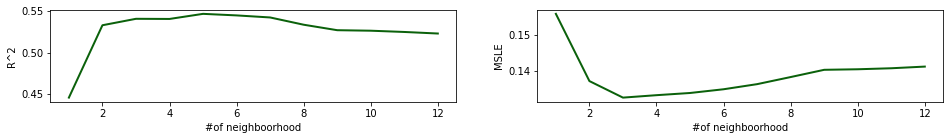

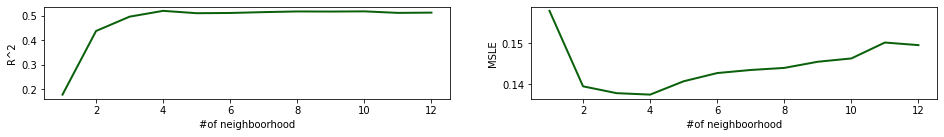

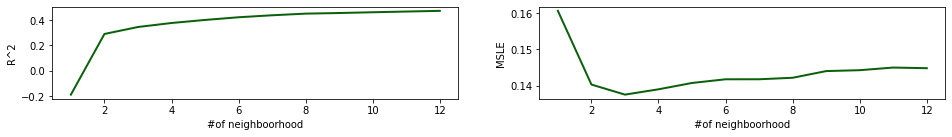

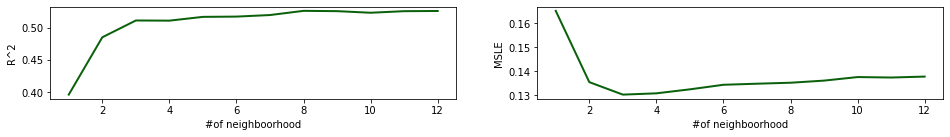

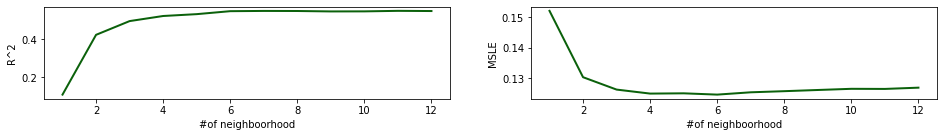

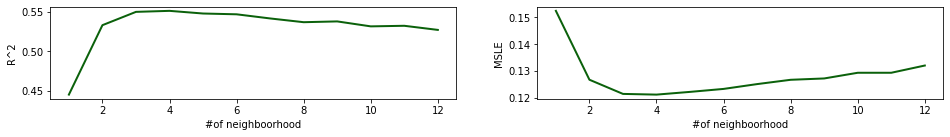

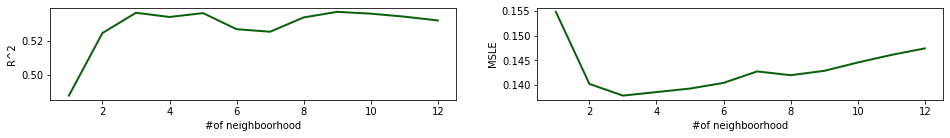

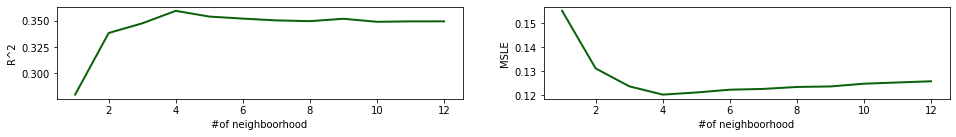

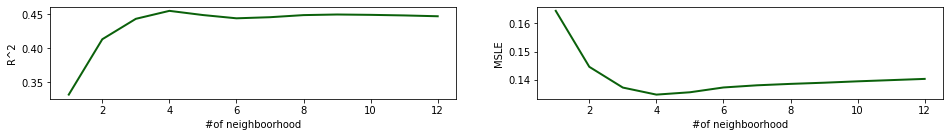

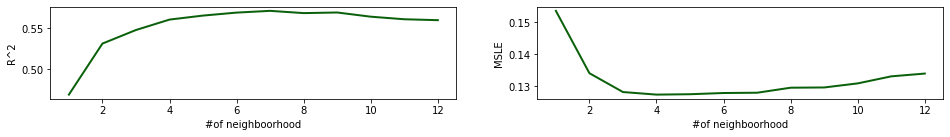

,0_MSLE,1_MSLE,2_MSLE,3_MSLE,4_MSLE,5_MSLE,6_MSLE,7_MSLE,8_MSLE,9_MSLE,mean of MSLE
0,0.155850,0.157946,0.160617,0.165152,0.152136,0.152353,0.154809,0.155148,0.164433,0.153588,0.157203
11,0.141276,0.149560,0.144792,0.137836,0.126844,0.131962,0.147397,0.125776,0.140325,0.133959,0.137973
10,0.140816,0.150197,0.144966,0.137448,0.126430,0.129263,0.146074,0.125269,0.139894,0.133090,0.137345
9,0.140538,0.146303,0.144241,0.137640,0.126466,0.129261,0.144541,0.124760,0.139466,0.130884,0.136410
1,0.137275,0.139481,0.140280,0.135535,0.130291,0.126668,0.140197,0.131142,0.144607,0.134070,0.135955
8,0.140389,0.145496,0.143994,0.136163,0.126080,0.127141,0.142847,0.123622,0.138974,0.129611,0.135432
7,0.138386,0.143988,0.142148,0.135283,0.125688,0.126642,0.141970,0.123397,0.138559,0.129535,0.134560
6,0.136425,0.143481,0.141737,0.134879,0.125319,0.125037,0.142734,0.122588,0.138057,0.127962,0.133822
5,0.135013,0.142728,0.141730,0.134434,0.124557,0.123240,0.140409,0.122259,0.137288,0.127874,0.132953
4,0.133982,0.140716,0.140715,0.132538,0.124981,0.122133,0.139259,0.121096,0.135586,0.127496,0.131850


In [ ]:
knOperator(data_unScaled,data_price)

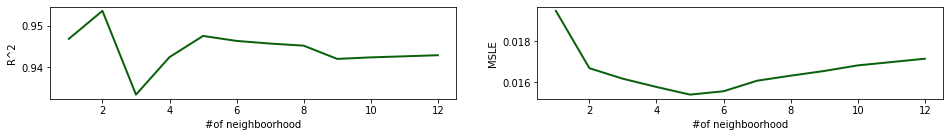

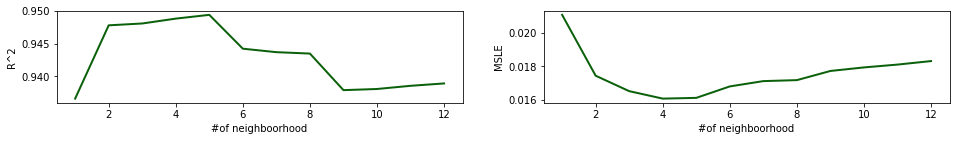

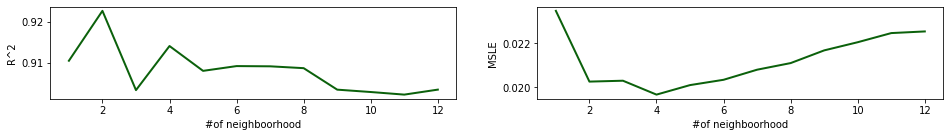

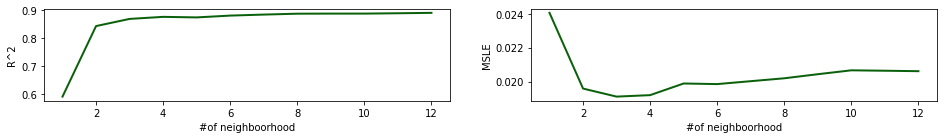

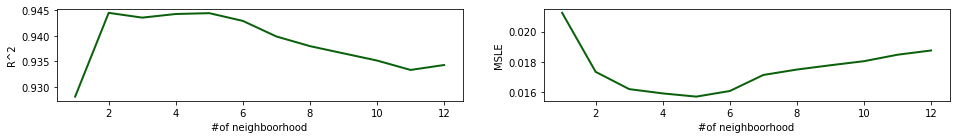

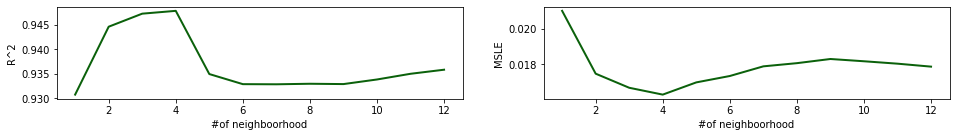

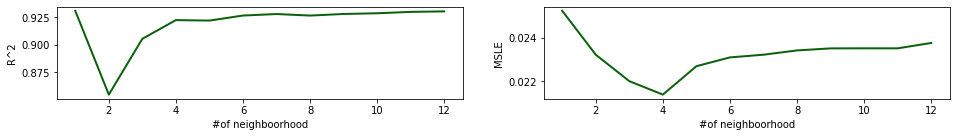

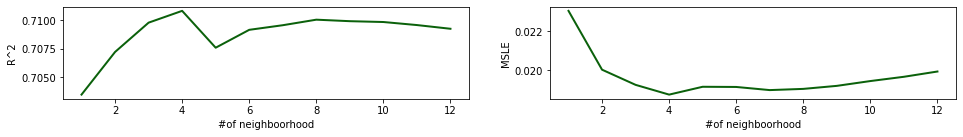

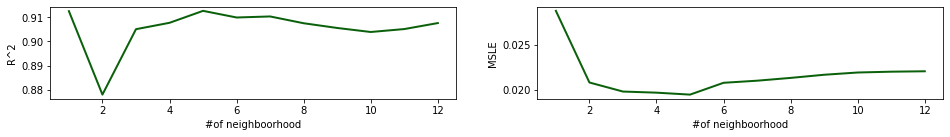

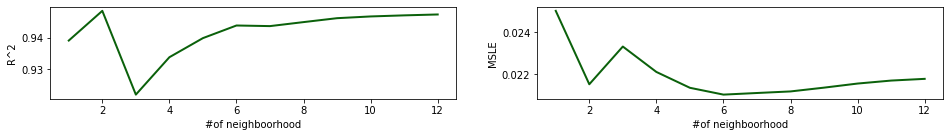

,0_MSLE,1_MSLE,2_MSLE,3_MSLE,4_MSLE,5_MSLE,6_MSLE,7_MSLE,8_MSLE,9_MSLE,mean of MSLE
0,0.019452,0.021085,0.023477,0.024044,0.021230,0.021028,0.025214,0.023072,0.028727,0.025027,0.023235
11,0.017144,0.018311,0.022540,0.020608,0.018756,0.017860,0.023753,0.019921,0.022054,0.021769,0.020272
10,0.016983,0.018101,0.022465,0.020635,0.018477,0.018028,0.023508,0.019648,0.022009,0.021687,0.020154
9,0.016823,0.017931,0.022049,0.020660,0.018052,0.018165,0.023510,0.019426,0.021918,0.021544,0.020008
8,0.016554,0.017719,0.021678,0.020431,0.017786,0.018294,0.023506,0.019176,0.021670,0.021348,0.019816
7,0.016326,0.017168,0.021100,0.020190,0.017502,0.018057,0.023413,0.019019,0.021323,0.021166,0.019527
1,0.016687,0.017433,0.020257,0.019585,0.017351,0.017460,0.023217,0.020016,0.020816,0.021509,0.019433
6,0.016085,0.017110,0.020799,0.020019,0.017148,0.017877,0.023218,0.018956,0.021014,0.021091,0.019332
5,0.015575,0.016791,0.020340,0.019848,0.016093,0.017328,0.023096,0.019119,0.020783,0.021014,0.018999
2,0.016179,0.016507,0.020298,0.019111,0.016216,0.016660,0.022014,0.019228,0.019816,0.023317,0.018935


In [ ]:
knOperator(data_normalized,data_price)

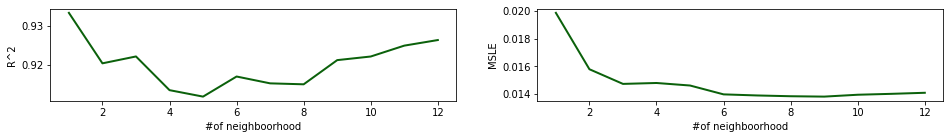

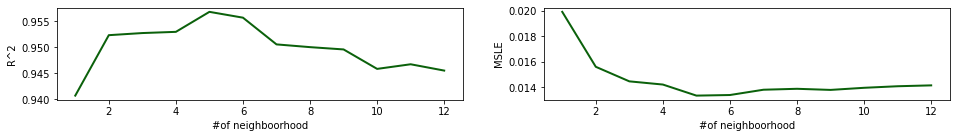

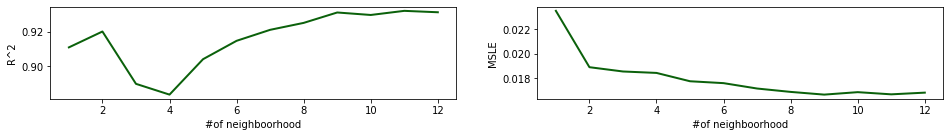

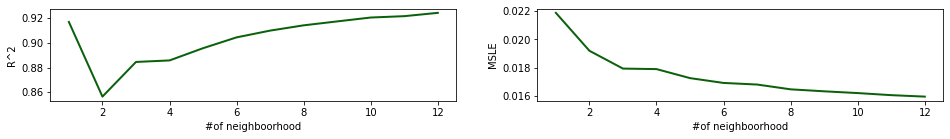

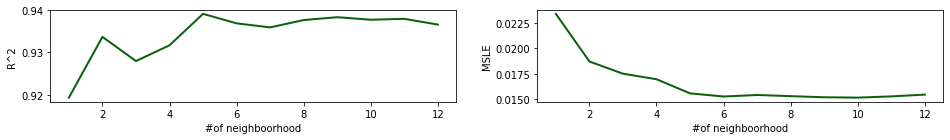

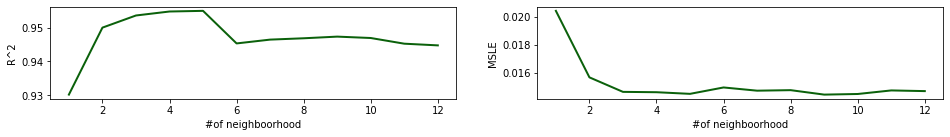

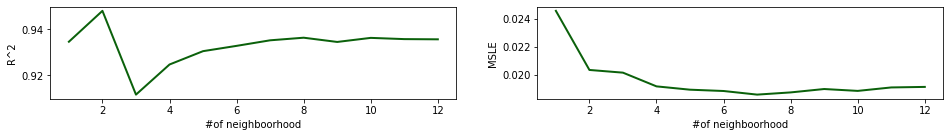

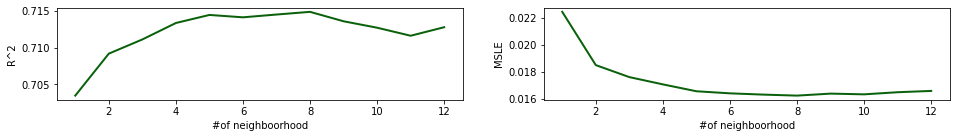

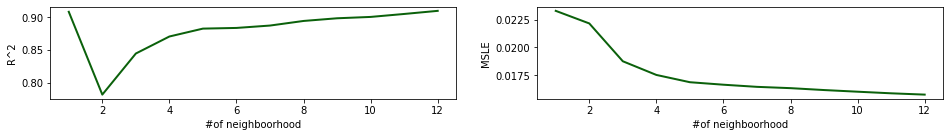

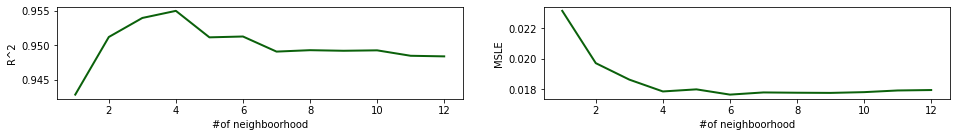

,0_MSLE,1_MSLE,2_MSLE,3_MSLE,4_MSLE,5_MSLE,6_MSLE,7_MSLE,8_MSLE,9_MSLE,mean of MSLE
0,0.019864,0.019919,0.023520,0.021870,0.023346,0.020438,0.024546,0.022464,0.023295,0.023132,0.022239
1,0.015799,0.015611,0.018917,0.019197,0.018702,0.015659,0.020335,0.018494,0.022158,0.019699,0.018457
2,0.014742,0.014471,0.018566,0.017941,0.017510,0.014617,0.020142,0.017599,0.018740,0.018618,0.017295
3,0.014807,0.014220,0.018449,0.017905,0.016971,0.014592,0.019165,0.017057,0.017505,0.017843,0.016852
4,0.014625,0.013353,0.017768,0.017269,0.015595,0.014474,0.018928,0.016544,0.016848,0.017980,0.016338
5,0.013987,0.013399,0.017614,0.016929,0.015286,0.014934,0.018835,0.016389,0.016623,0.017635,0.016163
6,0.013908,0.013814,0.017174,0.016817,0.015435,0.014702,0.018578,0.016293,0.016429,0.017778,0.016093
11,0.014101,0.014156,0.016838,0.015965,0.015472,0.014671,0.019127,0.016569,0.015728,0.017935,0.016056
10,0.014025,0.014087,0.016700,0.016068,0.015298,0.014720,0.019089,0.016472,0.015845,0.017907,0.016021
7,0.013852,0.013887,0.016898,0.016479,0.015322,0.014740,0.018735,0.016219,0.016312,0.017759,0.016020


In [ ]:
knOperator(data_standarized,data_price)

In [ ]:
# For the both normalized and standarized data sets, after the 6th neighborhood model becomes more stable and converges, but since the methodology considers \
# distance between items unScaled data does not work well.

method=[]
method_mean=[]
method_std=[]

def KN_Regressor_CV(data, price,data_name):
    neigh = KNeighborsRegressor(n_neighbors=6,weights='distance')
    cv= cross_val_score(neigh, data, price, cv=8) 
    
    method.append('KN_Regres_'+data_name)
    method_mean.append(cv.mean())
    method_std.append(cv.std())

In [ ]:
KN_Regressor_CV(data_unScaled,data_price,'data_unScaled')
KN_Regressor_CV(data_normalized,data_price,'data_normalized')
KN_Regressor_CV(data_standarized,data_price,'data_standarized')

In [ ]:
def LinearRegression_CV(data, price, data_name):
    LR = LinearRegression()
    cv = cross_val_score(LR, data, price, cv=8) 

    method.append('LinearRegression_'+data_name)
    method_mean.append(cv.mean())
    method_std.append(cv.std())



In [ ]:
LinearRegression_CV(data_unScaled,data_price,'data_unScaled')
LinearRegression_CV(data_normalized,data_price,'data_normalized')
LinearRegression_CV(data_standarized,data_price,'data_standarized')

In [ ]:
def GB_Regressor_CV(data, price, data_name):
    GBR =GradientBoostingRegressor(max_depth=12)
    cv = cross_val_score(GBR, data, price, cv=8) 

    method.append('GB_Regres_'+data_name)
    method_mean.append(cv.mean())
    method_std.append(cv.std())

In [ ]:
GB_Regressor_CV(data_unScaled,data_price,'data_unScaled')
GB_Regressor_CV(data_normalized,data_price,'data_normalized')
GB_Regressor_CV(data_standarized,data_price,'data_standarized')

In [ ]:
# def MLPRegressor_CV(data, price, data_name):
#     MLPReg = MLPRegressor(hidden_layer_sizes=180,random_state=1, max_iter=8000)
#     cv = cross_val_score(MLPReg, data, price, cv=3) 

#     method.append('MLP_Regres_'+data_name)
#     method_mean.append(cv.mean())
#     method_std.append(cv.std())


In [ ]:
# MLPRegressor_CV(data_unScaled,data_price,'data_unScaled')
# MLPRegressor_CV(data_normalized,data_price,'data_normalized')
# MLPRegressor_CV(data_standarized,data_price,'data_standarized')

In [ ]:
method_scores = {'Method':method, 'Mean Accuracy':method_mean, 'STD Accuracy':method_std
                         }
valuation = pd.DataFrame(method_scores)
valuation = valuation.sort_values(by='Mean Accuracy', ascending=False)


In [ ]:
KN_Regressor_CV(OL_dropped_unScaled,OL_dropped_price,'OL_dropped_unScaled')
KN_Regressor_CV(OL_dropped_normalized,OL_dropped_price,'OL_dropped_normalized')
KN_Regressor_CV(OL_dropped_standarized,OL_dropped_price,'OL_dropped_standarized')

LinearRegression_CV(OL_dropped_unScaled,OL_dropped_price,'OL_dropped_unScaled')
LinearRegression_CV(OL_dropped_normalized,OL_dropped_price,'OL_dropped_normalized')
LinearRegression_CV(OL_dropped_standarized,OL_dropped_price,'OL_dropped_standarized')

GB_Regressor_CV(OL_dropped_unScaled,OL_dropped_price,'OL_dropped_unScaled')
GB_Regressor_CV(OL_dropped_normalized,OL_dropped_price,'OL_dropped_normalized')
GB_Regressor_CV(OL_dropped_standarized,OL_dropped_price,'OL_dropped_standarized')

In [ ]:
method_scores = {'Method':method, 'Mean Accuracy':method_mean, 'STD Accuracy':method_std
                         }
valuation = pd.DataFrame(method_scores)
valuation = valuation.sort_values(by='STD Accuracy', ascending=True)
valuation

,Method,Mean Accuracy,STD Accuracy
15,GB_Regres_OL_dropped_unScaled,9.498757e-01,5.489028e-03
17,GB_Regres_OL_dropped_standarized,9.496210e-01,5.588333e-03
16,GB_Regres_OL_dropped_normalized,9.497118e-01,5.827837e-03
11,KN_Regres_OL_dropped_standarized,9.421578e-01,6.526606e-03
10,KN_Regres_OL_dropped_normalized,9.353699e-01,8.029111e-03
9,KN_Regres_OL_dropped_unScaled,5.123990e-01,2.789423e-02
0,KN_Regres_data_unScaled,4.831514e-01,7.326247e-02
2,KN_Regres_data_standarized,8.875180e-01,9.140130e-02
1,KN_Regres_data_normalized,8.631720e-01,1.136873e-01
7,GB_Regres_data_normalized,8.318028e-01,1.530920e-01


In [ ]:
def residual_plot(ytest1, yFit1, Method1='Method1',ytest2=[], yFit2=[], Method2='Method2', ytest3=[], yFit3=[], Method3='Method3'):

    residual1 = ytest1-yFit1
    
    

    fig = plt.figure(figsize = (20,15))

    ax1 = plt.subplot(3,2,1)
    sns.distplot(residual1, color ='#B40486')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.title(Method1 +'  '+ str(r2_score(ytest1, yFit1)),fontsize=13)
    plt.xlabel('Residual fit1',fontsize=13)
    plt.ylabel('Count',fontsize=13)
    

    ax2 = plt.subplot(3,2,2)
    plt.scatter(yFit1, residual1, color ='#B40486')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.xlabel('Predicted',fontsize=13)
    plt.ylabel('Residual fit1',fontsize=13)
    plt.axhline(y=0)
    plt.title(Method1 + ' Residual vs. Predicted',fontsize=13)

    if len(ytest2)>0:
      residual2 = ytest2-yFit2

      ax3 = plt.subplot(3,2,3)
      sns.distplot(residual2, color ='#58D3F7')
      plt.tick_params(axis='both', which='major', labelsize=10)
      plt.title(Method2 +'  '+ str(r2_score(ytest2, yFit2)),fontsize=13)
      plt.xlabel('Residual fit 2',fontsize=13)
      plt.ylabel('Count',fontsize=13)

      ax4 = plt.subplot(3,2,4)
      plt.scatter(yFit2, residual2, color ='#58D3F7')
      plt.tick_params(axis='both', which='major', labelsize=10)
      plt.xlabel('Predicted',fontsize=13)
      plt.ylabel('Residual fit2',fontsize=13)
      plt.axhline(y=0)
      plt.title(Method2 + ' Residual vs. Predicted',fontsize=13)
    
    if len(ytest2)>0:
      residual3 = ytest3-yFit3

      ax5 = plt.subplot(3,2,5)
      sns.distplot(residual3, color ='#FF8000')
      plt.tick_params(axis='both', which='major', labelsize=10)
      plt.title(Method3 +'  '+ str(r2_score(ytest3, yFit3)),fontsize=13)
      plt.xlabel('Residual fit3',fontsize=13)
      plt.ylabel('Count',fontsize=13)

      ax6 = plt.subplot(3,2,6)
      plt.scatter(yFit3, residual3, color ='#FF8000')
      plt.tick_params(axis='both', which='major', labelsize=10)
      plt.xlabel('Predicted',fontsize=13)
      plt.ylabel('Residual fit3',fontsize=13)
      plt.axhline(y=0)
      plt.title(Method3 + ' Residual vs. Predicted',fontsize=13)
  


    plt.show()

In [ ]:
def GBReg_Predictor(data, price):
    Xtrain, Xtest, ytrain, ytest = train_test_split(data, price,test_size=0.2,random_state=10)
    return(ytest, GradientBoostingRegressor().fit(Xtrain, ytrain).predict(Xtest))

def KNReg_Predictor(data, price):
    Xtrain, Xtest, ytrain, ytest = train_test_split(data, price,test_size=0.2,random_state=10)
    return(ytest, KNeighborsRegressor(n_neighbors=9,weights='distance').fit(Xtrain, ytrain).predict(Xtest))

def LNReg_Predictor(data, price):
    Xtrain, Xtest, ytrain, ytest = train_test_split(data, price,test_size=0.2,random_state=10)
    return(ytest, LinearRegression().fit(Xtrain, ytrain).predict(Xtest))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

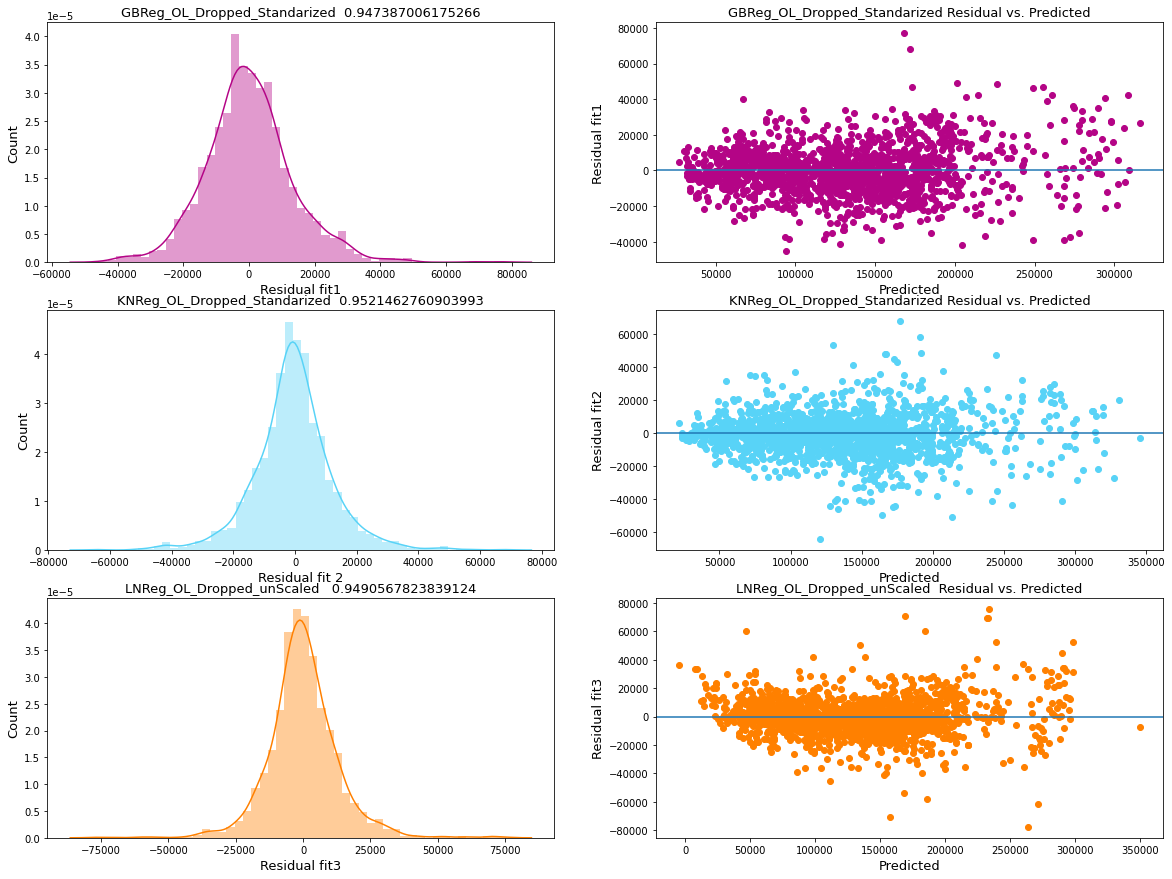

In [ ]:
test1, predict1 = GBReg_Predictor(OL_dropped_standarized, OL_dropped_price)
test2, predict2 = KNReg_Predictor(OL_dropped_standarized, OL_dropped_price)
test3, predict3 = LNReg_Predictor(OL_dropped_unScaled, OL_dropped_price)

residual_plot(test1, predict1, 'GBReg_OL_Dropped_Standarized', test2, predict2, 'KNReg_OL_Dropped_Standarized', test3, predict3, 'LNReg_OL_Dropped_unScaled ')

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(OL_dropped_standarized, OL_dropped_price,test_size=0.2,random_state=10)

MLPReg = MLPRegressor(hidden_layer_sizes=500,random_state=10, max_iter=25000)
MLPReg.fit(Xtrain,ytrain)



MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=500, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=25000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=10, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


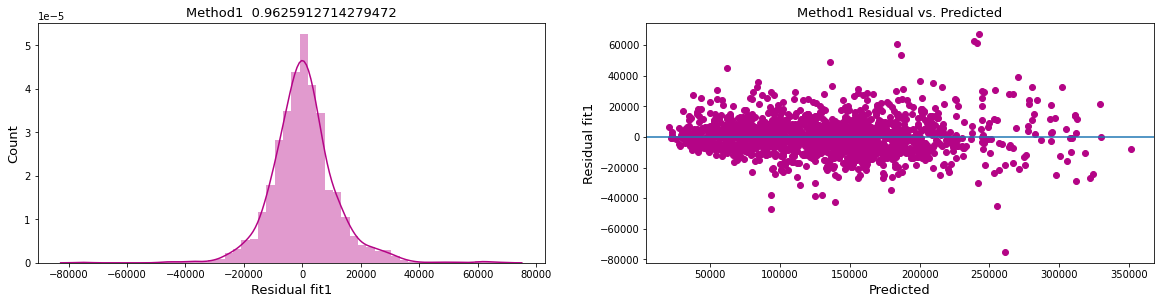

In [ ]:
yFit = MLPReg.predict(Xtest)
residual_plot(ytest,yFit)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

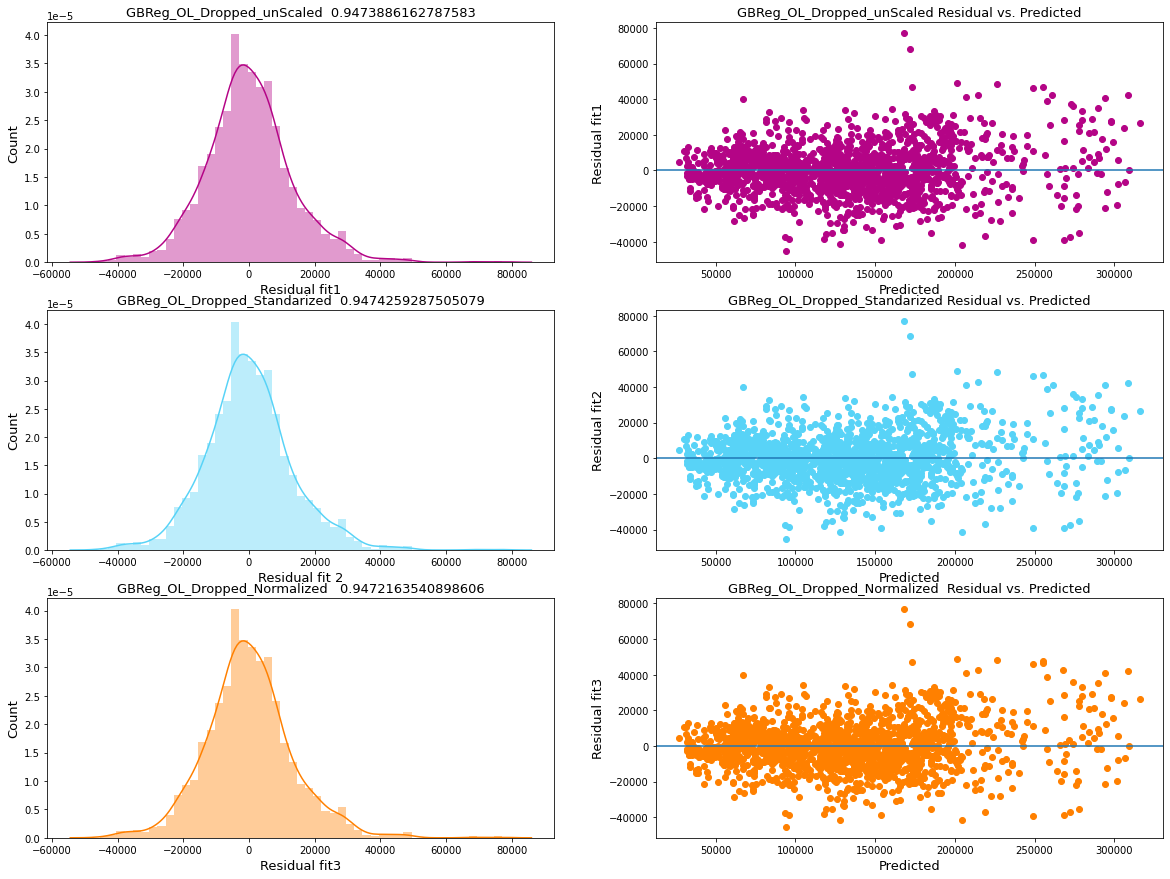

In [ ]:
test1, predict1 = GBReg_Predictor(OL_dropped_unScaled, OL_dropped_price)
test2, predict2 = GBReg_Predictor(OL_dropped_standarized, OL_dropped_price)
test3, predict3 = GBReg_Predictor(OL_dropped_normalized, OL_dropped_price)

residual_plot(test1, predict1, 'GBReg_OL_Dropped_unScaled', test2, predict2, 'GBReg_OL_Dropped_Standarized', test3, predict3, 'GBReg_OL_Dropped_Normalized ')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

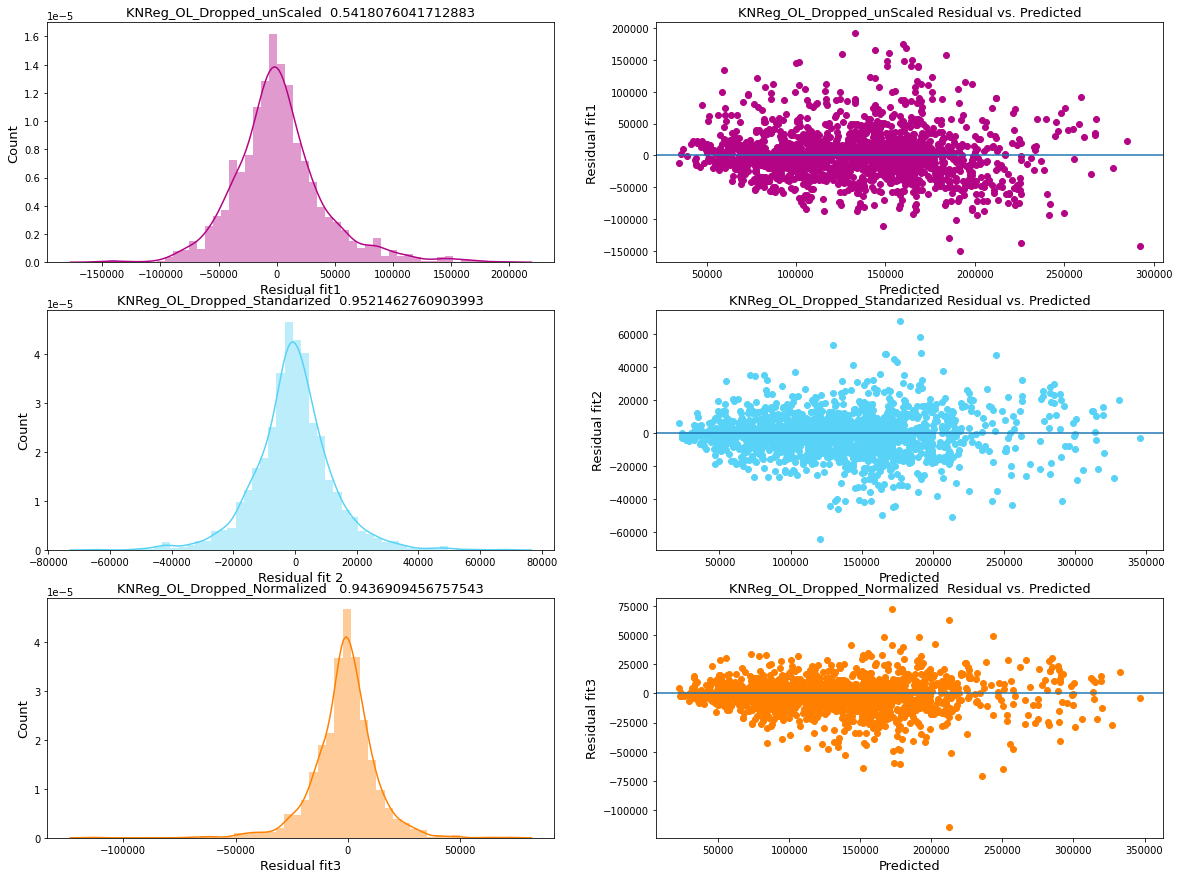

In [ ]:
test1, predict1 = KNReg_Predictor(OL_dropped_unScaled, OL_dropped_price)
test2, predict2 = KNReg_Predictor(OL_dropped_standarized, OL_dropped_price)
test3, predict3 = KNReg_Predictor(OL_dropped_normalized, OL_dropped_price)

residual_plot(test1, predict1, 'KNReg_OL_Dropped_unScaled', test2, predict2, 'KNReg_OL_Dropped_Standarized', test3, predict3, 'KNReg_OL_Dropped_Normalized ')